# Examples of XAFS data analysis with Larch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from larch.io import read_ascii
from larch.xafs import autobk
from sloth.utils.xafsplotter import XAFSPlotter

In [2]:
feo = read_ascii('./larch_data/feo_xafs.dat', labels = 'energy ctime i0 i1 nothing')
feo.mu = - np.log(feo.i1/feo.i0)
autobk(feo, kweight=2, rbkg=0.8, e0=7119.0)

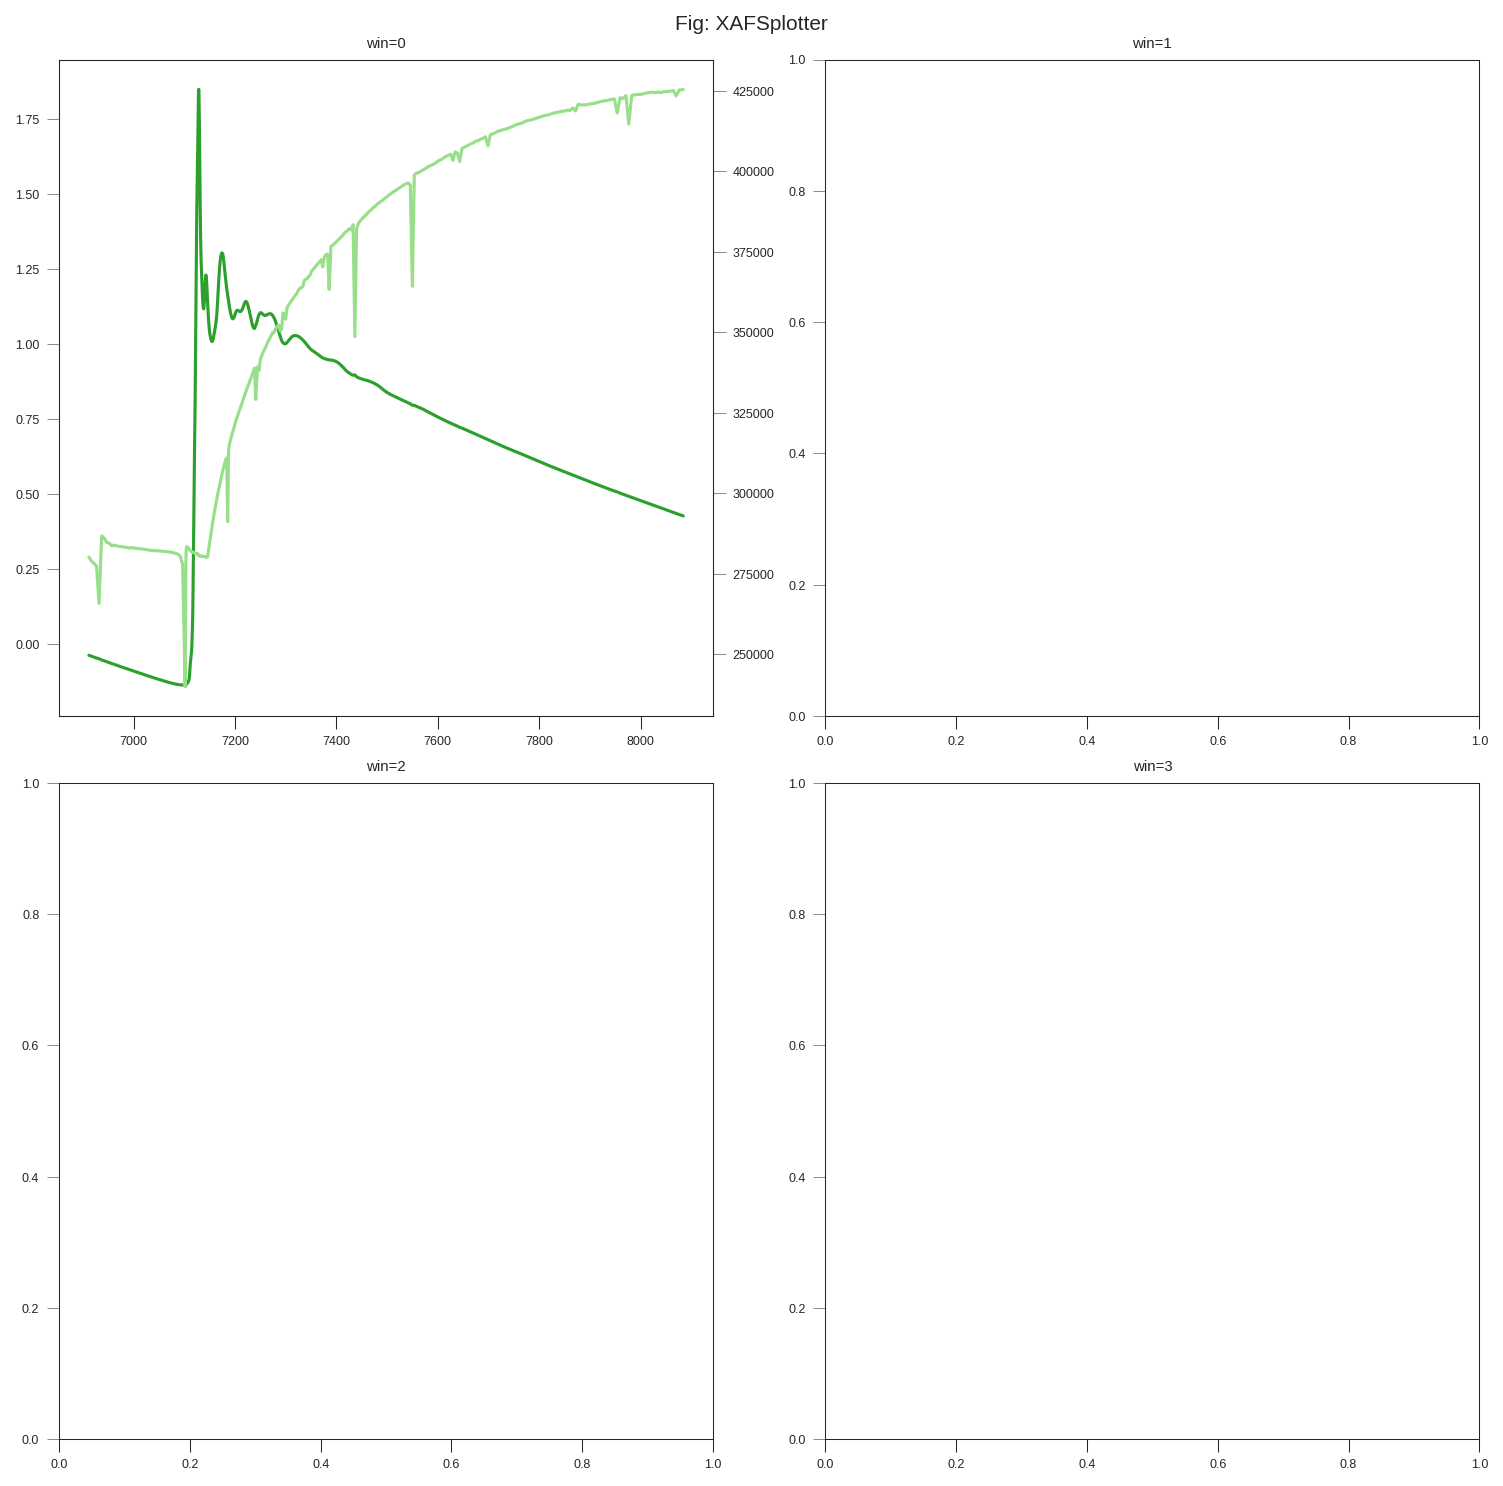

In [7]:
p = XAFSPlotter(ncols=2, nrows=2)
p.plot(feo.energy, feo.mu, label='raw', win=0)
p.plot(feo.energy, feo.i0, label='i0', win=0, side='right')
p.subplots_adjust(top=0.95)

In [4]:
dir(feo)

['array_labels',
 'atsym',
 'attrs',
 'autobk_details',
 'bkg',
 'chi',
 'chie',
 'ctime',
 'data',
 'delta_bkg',
 'delta_chi',
 'dmude',
 'e0',
 'edge',
 'edge_step',
 'edge_step_area',
 'edge_step_poly',
 'energy',
 'filename',
 'flat',
 'header',
 'i0',
 'i1',
 'k',
 'mu',
 'norm',
 'norm_area',
 'norm_poly',
 'nothing',
 'path',
 'post_edge',
 'pre_edge',
 'pre_edge_details']